<a href="https://colab.research.google.com/github/prishilevant/ce888/blob/main/lab_3/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.dummy import DummyClassifier
# from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [3]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv', delimiter = ';')
# data = df.values.T[1]
og_df = df
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Data preprocessing:
1. Use LabelEncoder to convert the label into numbers.
2. Perform one-hot encoding on the categorical features using df_dummies = pd.get_dummies(df)
3. Column "duration" must be deleted
4. Check if there are any missing values in the dataset. If there are, drop the rows.
5. Plot a histogram of the label (i.e., column 'y') and calculate the imbalance in the dataset (i.e., divide the number of instances of the minority class by the total length of the dataframe).

In [5]:
#3
df.drop(['duration'], axis=1)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [6]:
# Use LabelEncoder to convert the label into numbers
# https://pbpython.com/categorical-encoding.html
df['y'] = df['y'].astype('category')
df['y'] = df['y'].cat.codes
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [7]:
#Perform one-hot encoding on the categorical features using df_dummies = pd.get_dummies(df)
df_dummies = pd.get_dummies(df, columns=["job", "marital","marital","education","default","housing","loan","contact","month", "day_of_week","poutcome"])
df_dummies

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0


In [8]:
# Check if there are any missing values in the dataset. If there are, drop the rows.

print("Number of rows before dropping NaNs: %d" % len(df))
df = df.dropna()
print("Number of rows after dropping NaNs: %d" % len(df))

Number of rows before dropping NaNs: 41188
Number of rows after dropping NaNs: 41188


In [9]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 68 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  y                              41188 non-null  int8   
 11  job_admin.                     41188 non-null  uint8  
 12  job_blue-collar                41188 non-null 

# Plot a histogram of the label (i.e., column 'y') and calculate the imbalance in the dataset (i.e., divide the number of instances of the minority class by the total length of the dataframe).


In [10]:
y = df_dummies['y']
X = df_dummies.drop(['y'],axis=1)
print(X.size)
print(y.size)
print(y.value_counts())

2759596
41188
0    36548
1     4640
Name: y, dtype: int64


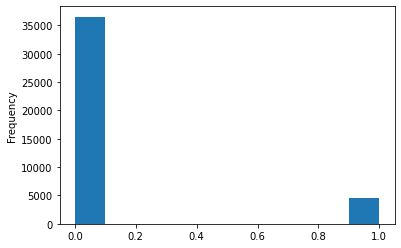

In [11]:
y.plot.hist()

In [12]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0


## Let's model the data:

Using the train_test_split function in scikit-learn, separate your dataset into a training and a test set, with a test size of 20% and random_state=50. Make sure the train/test split is stratified using the stratify parameter (and check that it is!). Stratified means that the percentages of classes in each fold remains constant.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50, stratify=y)
len(X_test)

8238

Report the results of 10-fold stratified cross-validation on the training set using a random forest classifier with 100 trees and depth=3. Ensure you're using an appropriate metric (print sorted(sklearn.metrics.SCORERS.keys()) to see what are the valid options and choose one for cross-validation).

In [14]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

In [15]:
kf = StratifiedKFold(n_splits=10, random_state=50, shuffle=True) 

In [16]:
clf = RandomForestClassifier(random_state= 50, n_estimators=100, max_depth=3)
clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=3, random_state=50)

In [17]:
import sklearn

In [18]:
print(sorted(sklearn.metrics.SCORERS.keys()))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'top_k_accuracy', 'v_measure_score']


In [19]:
f1_score = cross_val_score(clf, X_train, y_train, cv= 10, scoring="f1")
print(f'F1 score for each fold are: {f1_score}')
print(f'F1 average score: {"{:.2f}".format(f1_score.mean())}')

F1 score for each fold are: [0.20881671 0.21226415 0.18313253 0.21327014 0.18009479 0.2
 0.27777778 0.1971831  0.19477435 0.21495327]
F1 average score: 0.21


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      7310
           1       0.79      0.15      0.25       928

    accuracy                           0.90      8238
   macro avg       0.85      0.57      0.60      8238
weighted avg       0.89      0.90      0.87      8238



Compare the cross-validation results of your classifier with that of a dummy classifier.

In [21]:
d_clf = DummyClassifier(strategy="stratified")
d_clf.fit(X_train, y_train)
y_Prediction_dummy = d_clf.predict(X_test)

# Model Accuracy, how often is the classifier correct
print("Score:", d_clf.score(y_test, y_Prediction_dummy))

print("F1 Score:", metrics.f1_score(y_test, y_Prediction_dummy))

print("Recall:", metrics.recall_score(y_test, y_Prediction_dummy))

print("Recall:", metrics.r2_score(y_test, y_Prediction_dummy))

print(classification_report(y_test, d_clf.predict(X_test)))

Score: 0.7904831269725662
F1 Score: 0.11954765751211631
Recall: 0.11961206896551724
Recall: -0.9855196589461768
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      7310
           1       0.11      0.11      0.11       928

    accuracy                           0.80      8238
   macro avg       0.50      0.50      0.50      8238
weighted avg       0.80      0.80      0.80      8238



Use GridSearchCV to find a better set of parameters for your random forest.

In [22]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [100,200], 'max_depth':[8,12],
              'random_state': [50, 80], 'min_samples_split':[5, 10], 
              'max_features': ["auto", "sqrt"]}

In [23]:
clf_rf = RandomForestClassifier()
gsCV = GridSearchCV(estimator=clf_rf, param_grid=parameters, cv= 10)
# gsCV.fit(X_train, y_train)
# GridSearchCV(cv=10, estimator=RandomForestClassifier(),
#              param_grid={'max_depth': [8, 12], 'max_features': ['auto', 'sqrt'],
#                          'min_samples_split': [5, 10],
#                          'n_estimators': [100, 200], 'random_state': [50, 80]})

In [24]:
# print(gsCV.best_params_)
# {'max_depth': 12, 'max_features': 'auto', 'min_samples_split': 10, 'n_estimators': 200, 'random_state': 50}

AttributeError: ignored

Print the cross-validation metric (whichever you previously chose) that you obtain for the random forest for the best parameters found with GridSearchCV (on your training set)

In [25]:
best_rfl = RandomForestClassifier(max_depth= 12, max_features= 'auto',
                                  min_samples_split =  10, n_estimators= 200, random_state= 50)
best_rfl.fit(X_train, y_train)
scores = cross_val_score(best_rfl, X_train, y_train, cv=10)
print(classification_report(y_test, best_rfl.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7310
           1       0.74      0.35      0.48       928

    accuracy                           0.91      8238
   macro avg       0.83      0.67      0.71      8238
weighted avg       0.90      0.91      0.90      8238



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
clf.fit(X_train, y_train)
y_train_test = clf.predict(X_train)
confusion_matrix(y_train, y_train_test)

array([[29142,    96],
       [ 3195,   517]])

In [ ]:
y_pred_test = clf.predict(X_test)
confusion_matrix(y_test, y_pred_test)

array([[7274,   36],
       [ 792,  136]])

In [ ]:
print(classification_report(y_train, y_train_test))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     29238
           1       0.84      0.14      0.24      3712

    accuracy                           0.90     32950
   macro avg       0.87      0.57      0.59     32950
weighted avg       0.89      0.90      0.87     32950



In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      7310
           1       0.79      0.15      0.25       928

    accuracy                           0.90      8238
   macro avg       0.85      0.57      0.60      8238
weighted avg       0.89      0.90      0.87      8238



## Quiz

In [31]:
# If we define class imbalance as the number of examples from the minority class divided by the total number of examples, 
# what's the imbalance in the Bank dataset? Give your answer as a percentage without the % symbol and with two decimal numbers.
#  For example, if your calculation results in 53.33563%, write 53.34 as an answer

imbalance = len(df[df['y'] == 1])*100/len(df[df['y'] == 0])
imbalance

12.6956331399803

In [32]:
# Divide your training and test set using train_test_split and keeping your test set to 20% of the full dataset, 
# using random_state=50 when calling the function.Perform 10-fold cross-validation using as
#  a classifier a random forest with 300 estimators and a maximum depth of 6.
#  Report the average F1 score with two numbers after the floating point (e.g., 0.56)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50, stratify=y)
print(len(X_train),len(X_test),len(y_train),len(y_test))

clf_rf = RandomForestClassifier(n_estimators = 300,max_depth= 6)
clf_rf.fit(X_train, y_train)
scores = cross_val_score(clf_rf, X_train, y_train, cv=10,scoring="f1")
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))


32950 8238 32950 8238
scores: .0.319758 +/- .0.042258


In [33]:
# Divide your training and test set using train_test_split and keeping your test set to 20% of the full dataset, 
# using random_state=50 when calling the function.Perform 10-fold cross-validation using as a classifier a random 
# forest with 250 estimators and a maximum depth of 6. Report the average F1 score with two numbers after the floating point (e.g., 0.56)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50, stratify=y)
print(len(X_train),len(X_test),len(y_train),len(y_test))

clf_rf = RandomForestClassifier(n_estimators = 250,max_depth= 6)
clf_rf.fit(X_train, y_train)
scores = cross_val_score(clf_rf, X_train, y_train, cv=10,scoring="f1")
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))

32950 8238 32950 8238
scores: .0.315994 +/- .0.043322


Divide your training and test set using train_test_split and keeping your test set to 20% of the full dataset, using random_state=50 when calling the function.

Report the generalisation error of a random forest classifier with 100 estimators and a maximum depth of 6. Report the F1 score with two numbers after the floating point (e.g., 0.56).

Make sure you set the random_state parameter of RandomForestClassifier to 60.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50, stratify=y)
print(len(X_train),len(X_test),len(y_train),len(y_test))

clf_rf = RandomForestClassifier(n_estimators = 100,max_depth= 6, random_state=60)
clf_rf.fit(X_train, y_train)
scores = cross_val_score(clf_rf, X_train, y_train, cv=10,scoring="f1")
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))

32950 8238 32950 8238
scores: .0.320210 +/- .0.043395


Divide your training and test set using train_test_split and keeping your test set to 20% of the full dataset, using random_state=50 when calling the function.

Train a random forest classifier with 300 estimators and a maximum depth of 12, setting the random_state parameter to 60.

What are the top 3 features?

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50, stratify=y)
print(len(X_train),len(X_test),len(y_train),len(y_test))

clf_rf = RandomForestClassifier(n_estimators = 300,max_depth= 12, random_state=60)
clf_rf.fit(X_train, y_train)
scores = cross_val_score(clf_rf, X_train, y_train, cv=10,scoring="f1")
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))

32950 8238 32950 8238
scores: .0.474768 +/- .0.038732


In [38]:
# vitualization
import matplotlib.pyplot as plt

[ 1  8  9  3  0  7  5  6 66  2  4 54 65 57 64 47 55 48 60 36 43 61 41 62
 59 63 33 49 10 19 11 44 15 35 46 28 27 24 32 38 53 23 39 18 30 17 14 37
 26 22 58 56 16 31 20 50 52 12 13 42 45 51 21 29 25 34 40]
Feature ranking:
1. duration (0.317908)
2. euribor3m (0.102056)
3. nr.employed (0.092700)
4. pdays (0.056333)
5. age (0.039066)
6. cons.conf.idx (0.038930)
7. emp.var.rate (0.037029)
8. cons.price.idx (0.033331)
9. poutcome_success (0.030959)
10. campaign (0.016770)
11. previous (0.013802)
12. month_mar (0.009825)
13. poutcome_nonexistent (0.009245)
14. month_oct (0.008748)
15. poutcome_failure (0.008481)
16. contact_cellular (0.008475)
17. month_may (0.007694)
18. contact_telephone (0.006835)
19. day_of_week_mon (0.006668)
20. education_university.degree (0.006148)
21. housing_yes (0.005664)
22. day_of_week_thu (0.005499)
23. housing_no (0.005481)
24. day_of_week_tue (0.005468)
25. day_of_week_fri (0.005433)
26. day_of_week_wed (0.005052)
27. education_high.school (0.005048)
28. mont

(0.0, 0.38427500313106333)

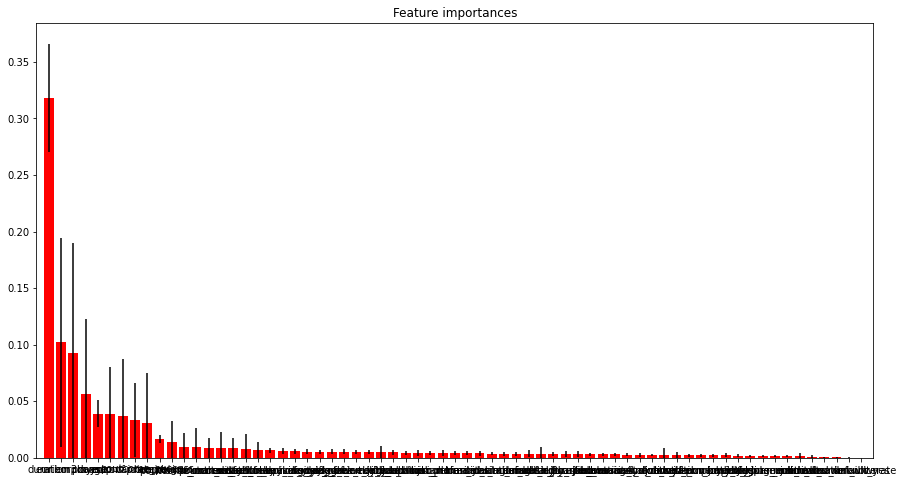

In [39]:
features = list(X.columns)

importances = clf_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices])
plt.xlim([-1, X.shape[1]])
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])

# plt.savefig("importances.png",bbox_inches='tight')
# plt.savefig("importances.pdf",bbox_inches='tight')

If this question fails when you upload your model, drop me an email with a link to your notebook so I can mark you manually.

Now you're free to explore any preprocessing and models you want and create a model that can obtain more than 90% F1-score on the test set of the banking dataset.

When you're done, you just need to upload the model and a csv file containing your preprocessed test set (named 'testset.csv' -- the label has to be in a column called 'y')

To save your model after training, in your notebook:

import pickle as pkl

outp = open('model.pkl', 'wb')
pkl.dump(clf, outp, -1)  # where clf is your classifier
outp.close()

In [42]:
import numpy as np
from sklearn.metrics import f1_score
import pickle as pkl
import pandas as pd
import os, contextlib
import warnings

warnings.filterwarnings("ignore")

# with open(os.devnull, 'w') as devnull:
#     with contextlib.redirect_stdout(devnull):
#         inp = open('model.pkl', 'rb')
#         clf = pkl.load(inp)
#         inp.close()
#         testset = pd.read_csv('testset.csv')
best_rfl = RandomForestClassifier(max_depth= 12, max_features= 'auto',
                                  min_samples_split =  10, n_estimators= 200, random_state= 50)
best_rfl.fit(X_train, y_train)
f1 = cross_val_score(best_rfl, X_train, y_train, cv=10)
print(classification_report(y_test, best_rfl.predict(X_test)))

x, y = testset.drop(labels=['y'], axis=1, inplace=False), testset['y']
y_pred = clf.predict(x)
f1 = f1_score(y, y_pred)
#print("F1-score on test set:", accuracy)
if f1 > 0.9:
  print("Success!")

FileNotFoundError: ignored